# Titanic - Machine Learning from Disaster

# Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is described at Kaggle.

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.
We may also want to develop some early understanding about the domain of our problem. This is described on the Kaggle competition description page. Here are the highlights to note.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Dataset:https://www.kaggle.com/c/titanic

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

<AxesSubplot:>

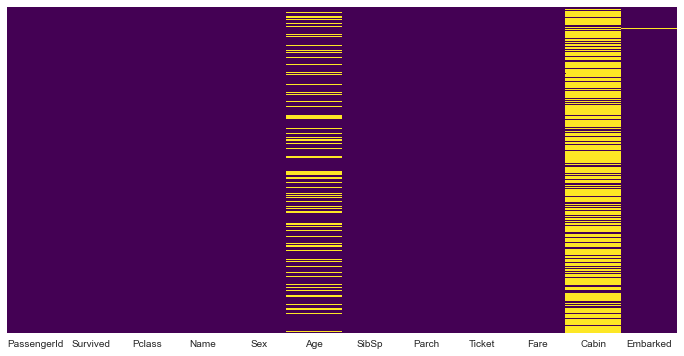

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

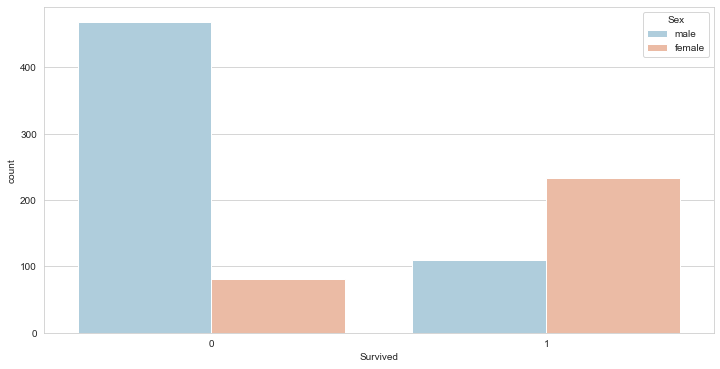

In [26]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

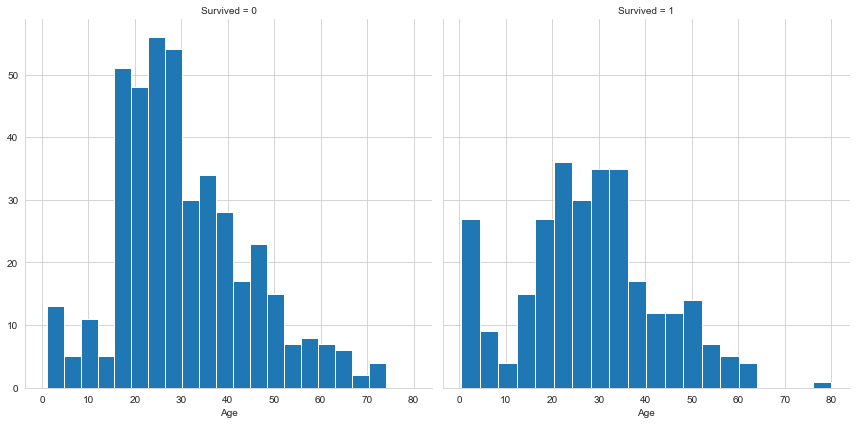

In [25]:
g = sns.FacetGrid(train,col='Survived',height=6)
g = g.map(plt.hist, 'Age', bins=20)

<AxesSubplot:xlabel='Survived', ylabel='count'>

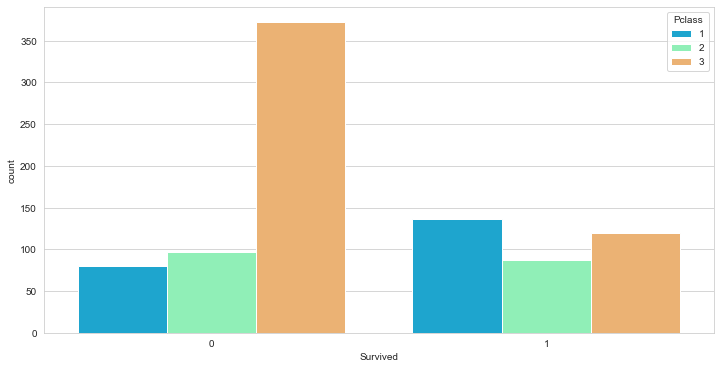

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

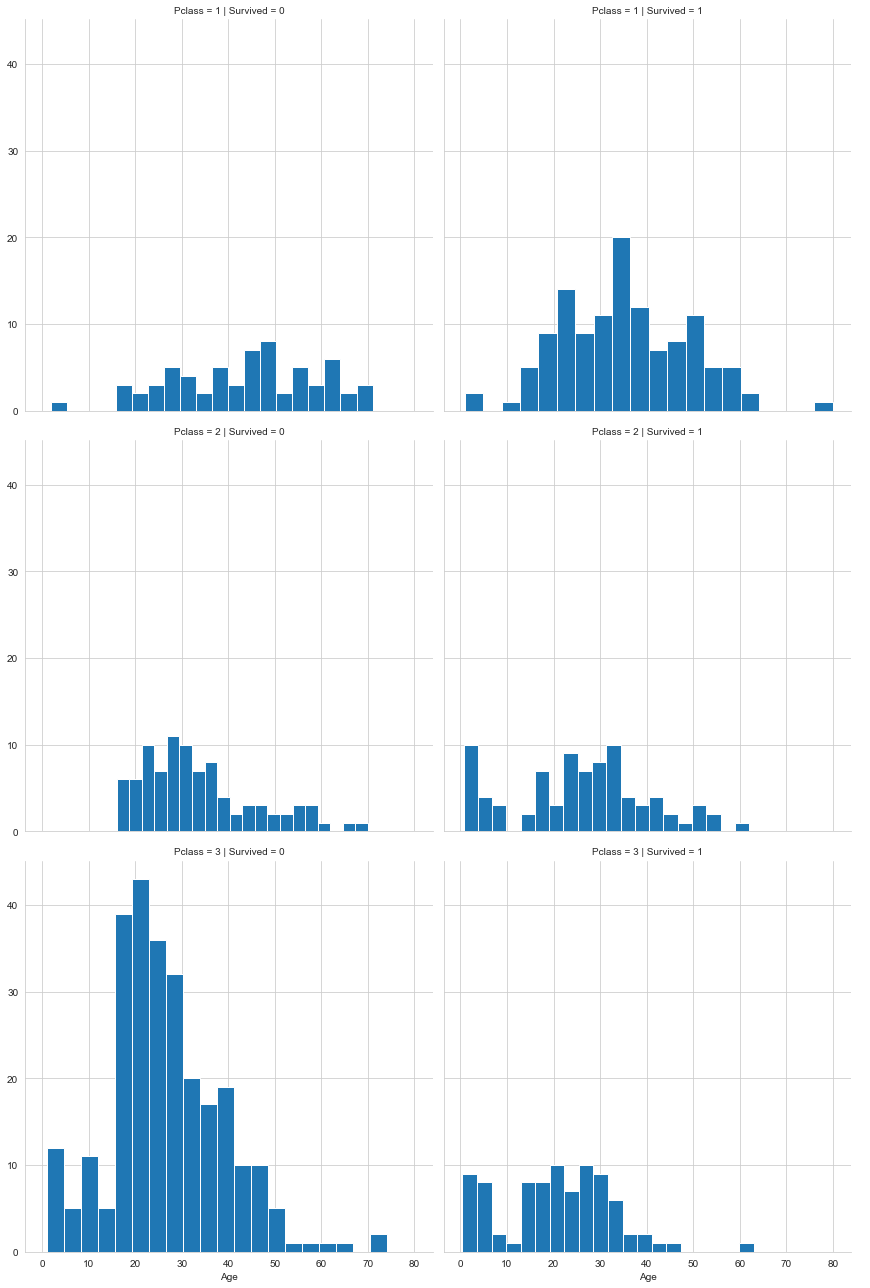

In [29]:
grid = sns.FacetGrid(train,col='Survived',row='Pclass',height=6)
grid = grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

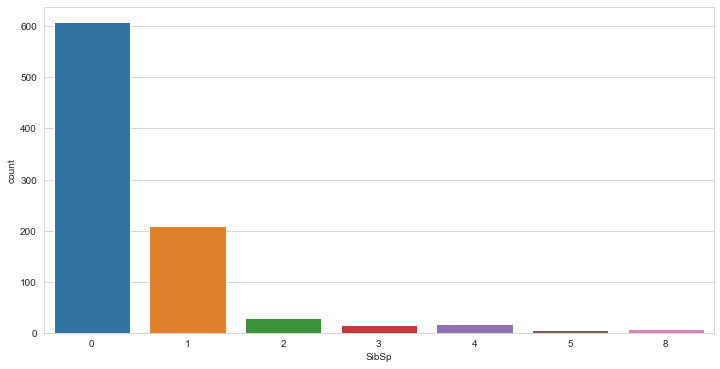

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

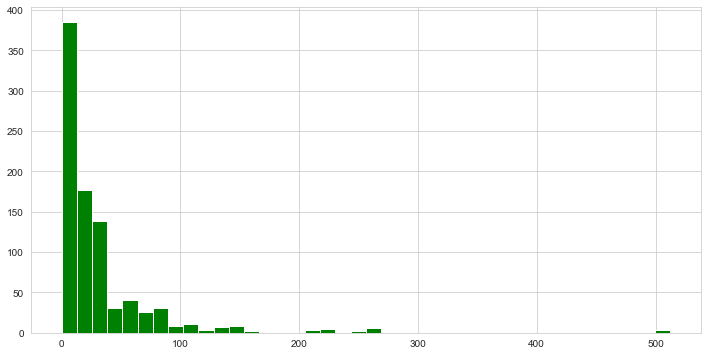

In [33]:
train['Fare'].hist(color='green',bins=40,figsize=(12,6))

# Data Cleaning

Dealing with Missing Data

mean of age in Pclass = 1 : 38.233440860215055
mean of age in Pclass = 2 : 29.87763005780347
mean of age in Pclass = 3 : 25.14061971830986


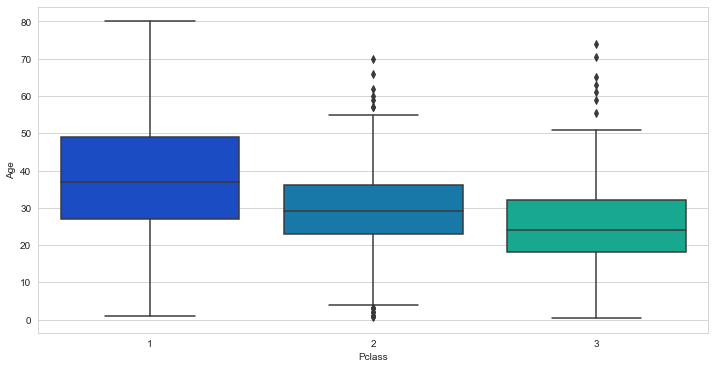

In [44]:
plt.figure(figsize=(12,6)) 
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
print(f"mean of age in Pclass = 1 : {np.mean(train[train['Pclass']==1]['Age'])}")
print(f"mean of age in Pclass = 2 : {np.mean(train[train['Pclass']==2]['Age'])}")
print(f"mean of age in Pclass = 3 : {np.mean(train[train['Pclass']==3]['Age'])}")

In [45]:
# Function apply on new Age coloum.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [46]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

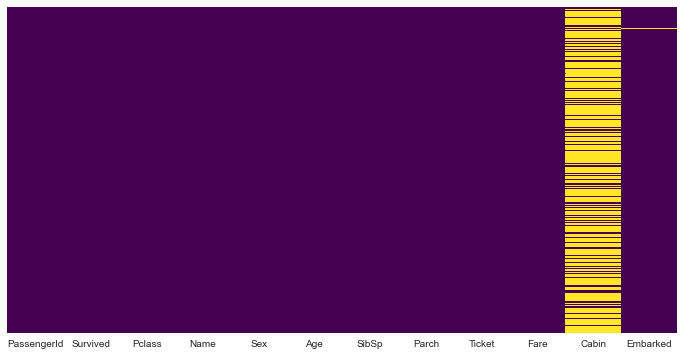

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now the missing age data are filling up

In [48]:
train.drop('Cabin',axis=1,inplace=True)

Since Cabin had too many missing data, so we simply drop this.

In [51]:
# Figure out the most common occurance in Embarked
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [52]:
# Fill in the missing value of Embarked
train['Embarked'] = train['Embarked'].fillna(freq_port)

<AxesSubplot:>

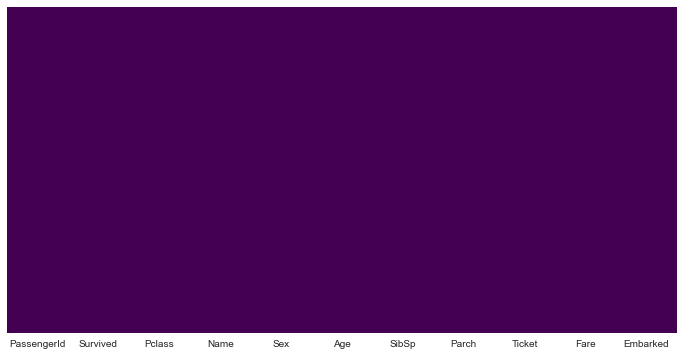

In [54]:
# check any missing data
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

In [56]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [57]:
# Final data set
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


# Data Modelling

Logistic Regression

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [65]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [74]:
log_pred = logmodel.predict(X_test)

In [80]:
print('confustion matrix: ')
print(confusion_matrix(y_test,log_pred))
print('_'*55)
print('classification report: ')
print(classification_report(y_test,log_pred))

confustion matrix: 
[[139  15]
 [ 38  76]]
_______________________________________________________
classification report: 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.84      0.67      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



In [70]:
acc_log = accuracy_score(y_test, log_pred)

In [71]:
print('Accuracy of Logistic Regression model', acc_log)

Accuracy of Logistic Regression model 0.8022388059701493


Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [85]:
print('confustion matrix: ')
print(confusion_matrix(y_test,dtc_pred))
print('_'*55)
print('classification report: ')
print(classification_report(y_test,dtc_pred))

confustion matrix: 
[[131  23]
 [ 41  73]]
_______________________________________________________
classification report: 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       154
           1       0.76      0.64      0.70       114

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [86]:
acc_dtree = accuracy_score(y_test, dtc_pred)
print('Accuracy of Decision Tree Classifier', acc_dtree)

Accuracy of Decision Tree Classifier 0.7611940298507462


Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [90]:
print('confustion matrix: ')
print(confusion_matrix(y_test,rfc_pred))
print('_'*55)
print('classification report: ')
print(classification_report(y_test,rfc_pred))

confustion matrix: 
[[139  15]
 [ 39  75]]
_______________________________________________________
classification report: 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       154
           1       0.83      0.66      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



In [91]:
acc_rf = accuracy_score(y_test, rfc_pred)
print('Accuracy of Decision Tree Classifier', acc_rf)

Accuracy of Decision Tree Classifier 0.7985074626865671


Support Vector Machine

In [92]:
from sklearn import svm

In [93]:
svmodel = svm.SVC()
svmodel.fit(X_train,y_train)
svm_pred = svmodel.predict(X_test)

In [94]:
print('confustion matrix: ')
print(confusion_matrix(y_test,svm_pred))
print('_'*55)
print('classification report: ')
print(classification_report(y_test,svm_pred))

confustion matrix: 
[[140  14]
 [ 40  74]]
_______________________________________________________
classification report: 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       154
           1       0.84      0.65      0.73       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



In [96]:
acc_svc = accuracy_score(y_test, svm_pred)
print('Accuracy of Decision Tree Classifier', acc_svc)

Accuracy of Decision Tree Classifier 0.7985074626865671


KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)
knn_pred = knnmodel.predict(X_test)

In [99]:
print('confustion matrix: ')
print(confusion_matrix(y_test,knn_pred))
print('_'*55)
print('classification report: ')
print(classification_report(y_test,knn_pred))

confustion matrix: 
[[135  19]
 [ 39  75]]
_______________________________________________________
classification report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [101]:
acc_knn = accuracy_score(y_test, knn_pred)
print('Accuracy of Decision Tree Classifier', acc_knn)

Accuracy of Decision Tree Classifier 0.7835820895522388


# Model Selection

In [103]:
models = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_log,acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,0.802239
2,Random Forest,0.798507
3,Support Vector Machines,0.798507
4,K - Nearest Neighbors,0.783582
1,Decision Tree,0.761194


We can now rank our evaluation of all the models to choose the best one for our problem. We choose to use Logistic Regression as it has the highest accuracy.